In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housing.csv')
df.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
#Lets check the value counts
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#as this Ocean Proximity dont shows as much importance lets delete that perticular column..
df.drop(['ocean_proximity'],axis=1,inplace=True)

In [7]:
df.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [8]:
#Lets check for null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

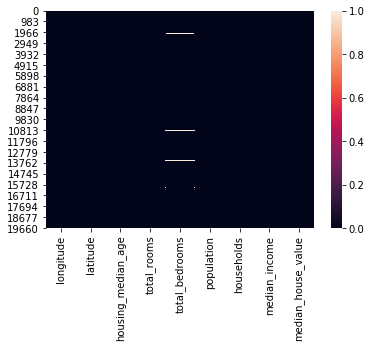

In [9]:
#Lets check again with heatmap
sns.heatmap(df.isnull())

In [10]:
#Lets fill this Na values with 0 as we dont know what exactly the value of NA
df.fillna(0, inplace=True)

In [11]:
df.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


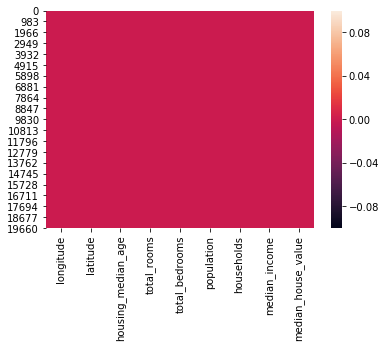

In [12]:
#Lets check again with null values
sns.heatmap(df.isnull())

In [13]:
df.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


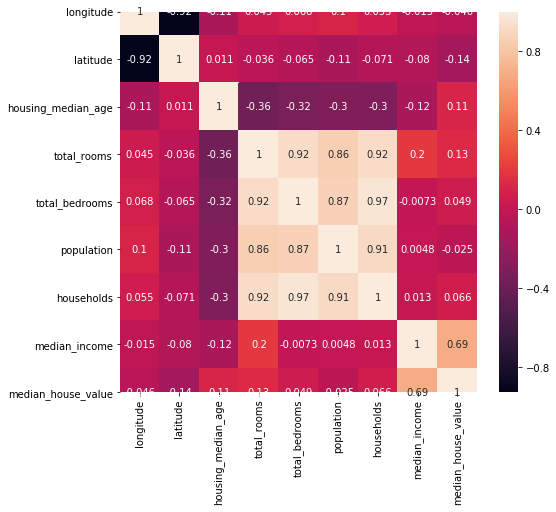

In [14]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

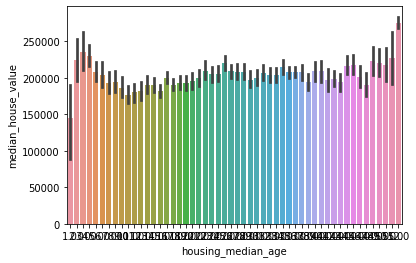

In [15]:
#Lets check with the house median age with house value
sns.barplot(x='housing_median_age',y='median_house_value',data=df)
plt.show()

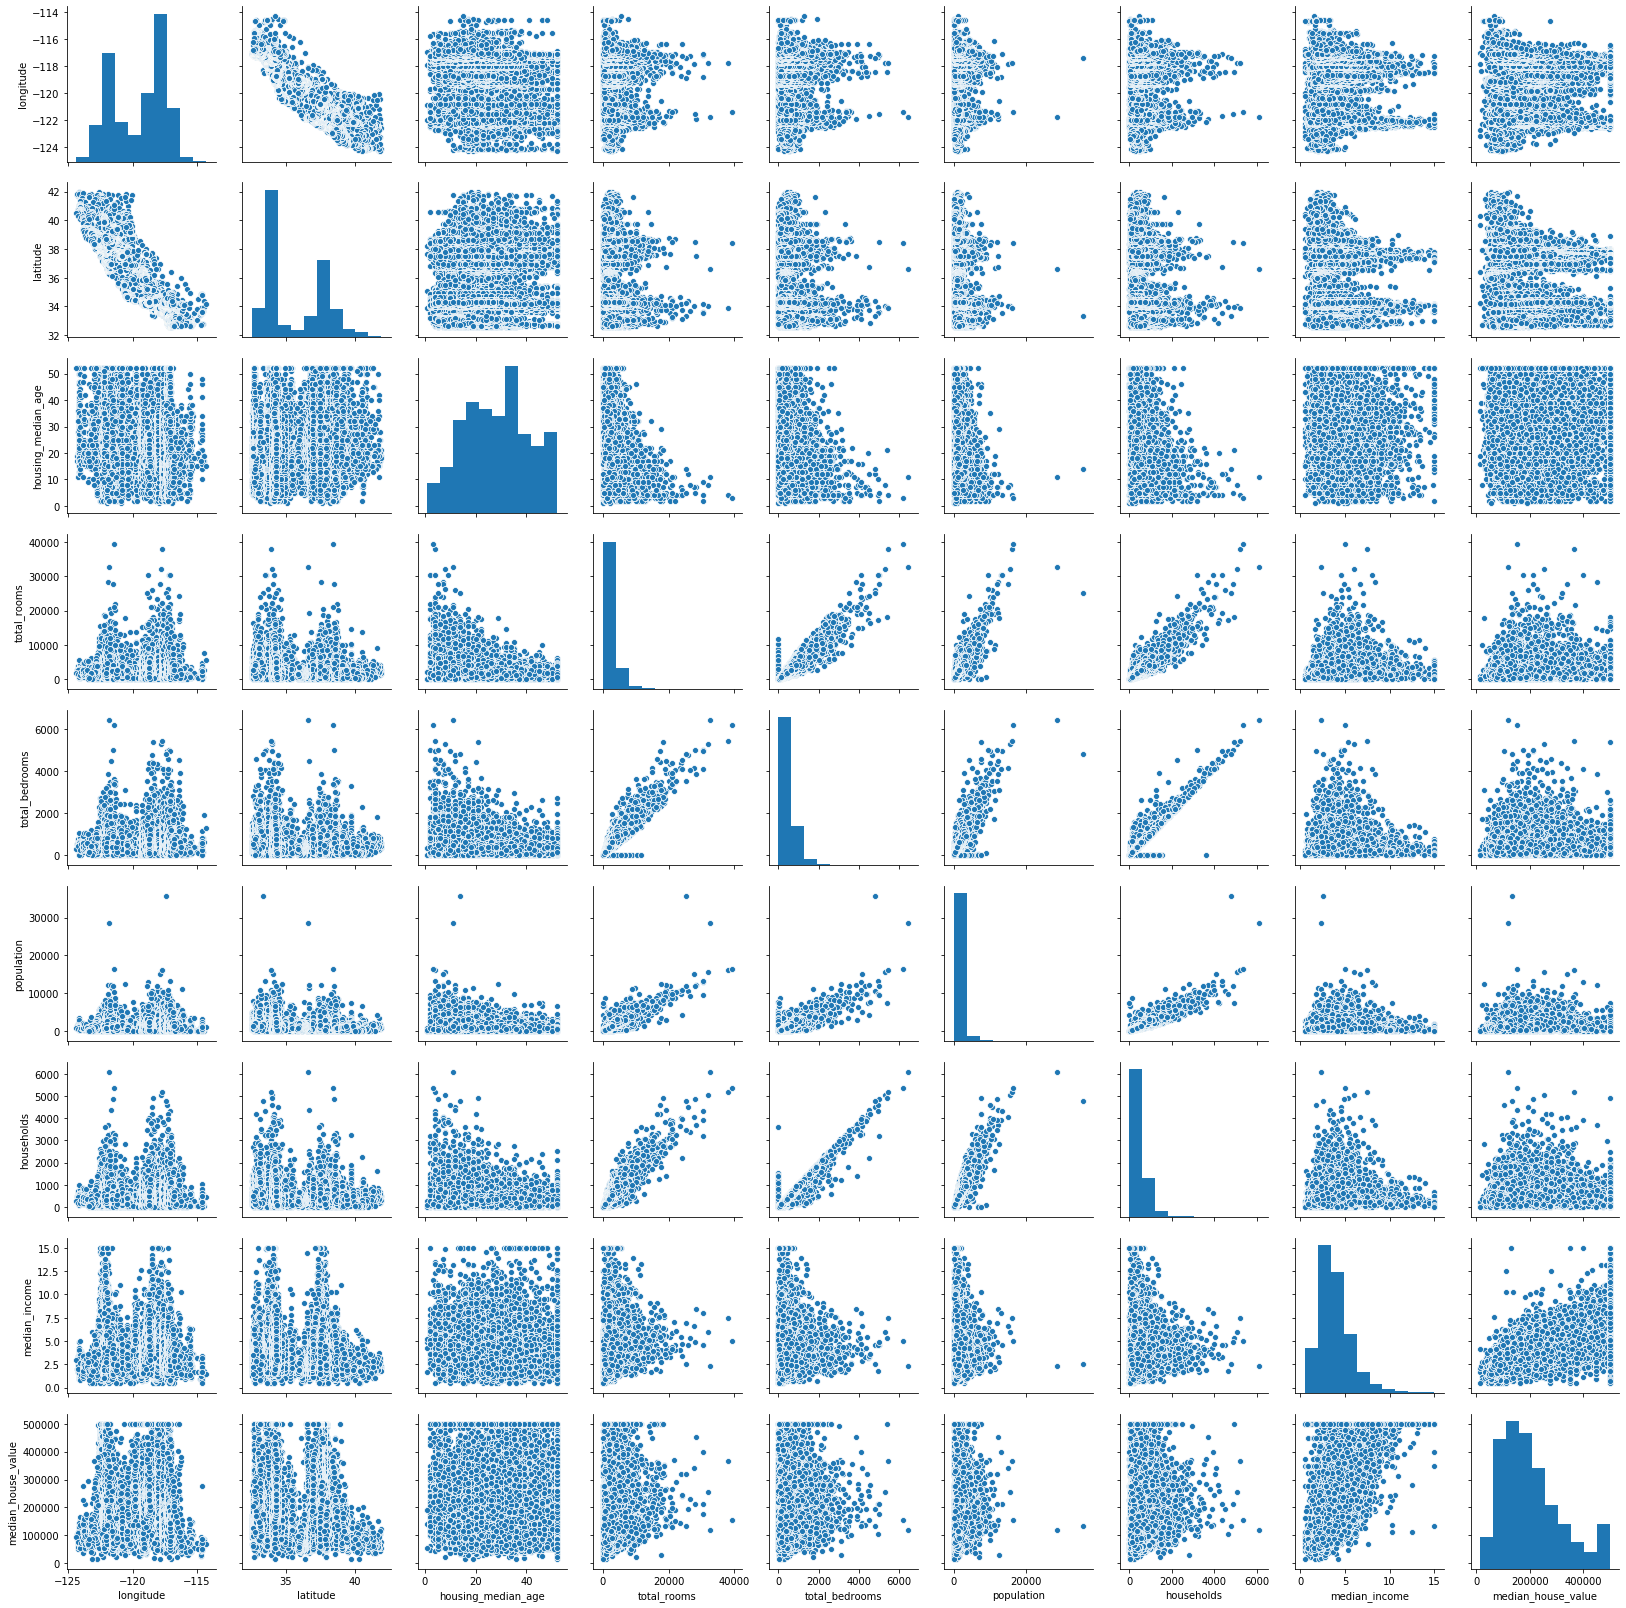

In [16]:
#lets check the regression parameters by pairplot
sns.pairplot(df)
plt.show()
#as per the plots and diagram shown in a graphical representation we can see this is a clear problem of linear regression
#so we will go ahead for the prediction with linear regression model 

In [17]:
#lets check the skewness of the data
df.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.411128
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [18]:
#change the values in each columns by replacing log1 values
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [19]:
#lets check the skewness of the data
df.skew()
#here we can see that after checking out the skewness still some values are more so will scaled all the values at one node 
#by standard scaling

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms          -1.075533
total_bedrooms       -2.923871
population           -1.044087
households           -1.051607
median_income         0.226083
median_house_value   -0.173166
dtype: float64

In [20]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(20640, 9)
(19920, 9)


In [21]:
#lets separate x and y
df_x = df_final.drop(columns=["median_house_value"],axis=1)
y = df_final[["median_house_value"]]

In [22]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [23]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [24]:
print(x_train.shape,x_test.shape)

(13944, 8) (5976, 8)


In [25]:
print(y_train.shape,y_test.shape)

(13944, 1) (5976, 1)


In [26]:
#lets create a function to call 

def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max r2 corrosponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [27]:
#lets apply first algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.6936273736138687
r2 score corresponding to 43 is 0.7084565383694867
r2 score corresponding to 44 is 0.7091220813361943
r2 score corresponding to 45 is 0.7047052811781677
r2 score corresponding to 46 is 0.7178336267897766
r2 score corresponding to 47 is 0.7103662727992444
r2 score corresponding to 48 is 0.7025258709657686
r2 score corresponding to 49 is 0.7118792230547781
r2 score corresponding to 50 is 0.6963847764992233
r2 score corresponding to 51 is 0.7050675181686294
r2 score corresponding to 52 is 0.7060287182329814
r2 score corresponding to 53 is 0.6948566196432824
r2 score corresponding to 54 is 0.7129439297033905
r2 score corresponding to 55 is 0.7120929783603224
r2 score corresponding to 56 is 0.7087002659068738
r2 score corresponding to 57 is 0.7074884714968597
r2 score corresponding to 58 is 0.7148505472439265
r2 score corresponding to 59 is 0.7143428086999124
r2 score corresponding to 60 is 0.7076555557473032
r2 score corresponding to 61 is

In [28]:
#here we can see that we have to use other algorithms to improve the model

In [29]:
#lets go for the next model and find out the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors , cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 11}

In [30]:
#lets apply and get the r2 score
knr = KNeighborsRegressor(n_neighbors=11)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.7438442230091926
r2 score corresponding to 43 is 0.7527862046493138
r2 score corresponding to 44 is 0.7576691995193559
r2 score corresponding to 45 is 0.7517008252198858
r2 score corresponding to 46 is 0.7625501939020404
r2 score corresponding to 47 is 0.761412452540177
r2 score corresponding to 48 is 0.7523287805017342
r2 score corresponding to 49 is 0.7587016367645643
r2 score corresponding to 50 is 0.752472262723338
r2 score corresponding to 51 is 0.7605449182946404
r2 score corresponding to 52 is 0.7476277358140975
r2 score corresponding to 53 is 0.7495944909596213
r2 score corresponding to 54 is 0.7565669636560817
r2 score corresponding to 55 is 0.7627676624491296
r2 score corresponding to 56 is 0.7552372676940463
r2 score corresponding to 57 is 0.7566870987867944
r2 score corresponding to 58 is 0.7600117488228078
r2 score corresponding to 59 is 0.7563565134471792
r2 score corresponding to 60 is 0.7640972345481507
r2 score corresponding to 61 is 0

In [31]:
#lets check mean r2 score of both of linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print("mean r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("mean r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

mean r2 score of linear regression is  0.6338398045765138
mean standard deviation in r2 score of linear regression is  0.09595208027735977

mean r2 score of knn regression is  0.6212978327532456
mean standard deviation in r2 score of knn regression is  0.0532291875835239


In [32]:
#lets check laso regression 
from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {"alpha":[0.001,0.01,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [33]:
lsreg = Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.693058055452527
r2 score corresponding to 43 is 0.7076751593484032
r2 score corresponding to 44 is 0.7086305608520219
r2 score corresponding to 45 is 0.7050186508343864
r2 score corresponding to 46 is 0.7165733464498426
r2 score corresponding to 47 is 0.7103835568404544
r2 score corresponding to 48 is 0.702606800390332
r2 score corresponding to 49 is 0.7119009357888995
r2 score corresponding to 50 is 0.6968811435002846
r2 score corresponding to 51 is 0.7036660287573965
r2 score corresponding to 52 is 0.7058037778023345
r2 score corresponding to 53 is 0.6948437287928564
r2 score corresponding to 54 is 0.7124303739848212
r2 score corresponding to 55 is 0.7117715852320277
r2 score corresponding to 56 is 0.7085739407423094
r2 score corresponding to 57 is 0.7066649240143807
r2 score corresponding to 58 is 0.7144221375151076
r2 score corresponding to 59 is 0.7141073046776134
r2 score corresponding to 60 is 0.7073643236172047
r2 score corresponding to 61 is 0

In [34]:
print("mean r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of Lasso regression is  0.6314747766460764
mean standard deviation in r2 score of Lasso regression is  0.10005251373486757



In [35]:
from sklearn.externals import joblib

In [36]:
joblib.dump(knr, 'houseprediction_Model.pkl')

['houseprediction_Model.pkl']